<a href="https://colab.research.google.com/github/Amoldwalunj/Jeanet_data_analysis/blob/main/Data_analysis_Jeanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

**Loading data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Jeanet/texts_nlp_50.csv', delimiter='\t')

In [ ]:
df.head()

,year_viaf,fem,common_10first,latlon1,mainr,rni3,nprofs,reljob2,scijob2,genres_wcat,roles_wcat,associated_subjects_wcat,titles_by_eng1_wcat,titles_about_eng1_wcat,summaries_by_eng1_wcat,summaries_about_eng1_wcat,dup,dup_about
0,1810,0,0,331,685591,1,NaN,NaN,NaN,maps;; pictorial works;; tourist maps;; pictor...,author;; cartographer;; artist;; illustrator;;...,france--paris;; fortification;; streets;; fran...,"the hotel dieu, paris: as seen from pont st. m...",NaN,in addition to the present edition vallee list...,NaN,1,51660
1,1882,0,1,505,3868102,0,NaN,NaN,NaN,history;; diaries;; caricatures and cartoons,author;; author of introduction;; creator,communism;; socialism;; soviet union;; barbell...,the moscow trial;; a last diary ... with a pre...,NaN,an account of the state trial in moscow of the...,NaN,0,51660
2,1894,0,1,509,3967398,1,1.0,0.0,0.0,history;; fiction,author;; editor,great britain;; fascism;; city promotion;; cit...,action; for king and people;; what the british...,the rebel who lost his cause : the tragedy of ...,NaN,"""""even by the standards of the heated politic...",26422,0
3,1922,feminine,0,290,1600928,1,2.0,0.0,1.0,classification;; bibliographies;; handbooks an...,author;; translator;; editor;; contributor;; o...,botany;; micronesia;; plants;; sedimentary str...,NaN,NaN,the pantropical thespesia populnea (malvaceae...,NaN,0,51660
4,1865,0,0,509,5761595,0,2.0,0.0,0.0,fiction;; humorous fiction;; satire;; juvenile...,illustrator;; author,mistaken identity;; american wit and humor;; i...,told by the colonel;; a dozen all told : bein...,catalogue of an exhibition of water colours b...,"percy groves, a spirited english lad, joins hi...",(1) requests a box to take hal hurst and anoth...,0,0


In [ ]:
df.shape

(37387, 18)

**Text cleaning by removing Nan values, converting column- summaries_by_eng1_wcat to string**

In [ ]:
###checking nan

num_nan_values = df['summaries_by_eng1_wcat'].isna().sum()
print(num_nan_values)


13008


In [ ]:
###removing Nan rows
df = df.dropna(subset=['summaries_by_eng1_wcat'])

In [ ]:
### converting summaries_by_eng1_wcat column to string

df['summaries_by_eng1_wcat']= df['summaries_by_eng1_wcat'].astype(str)

**Removing stop words and applying lemmatizer from nltk**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 1. Remove stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['summaries_by_eng1_wcat'] = df['summaries_by_eng1_wcat'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# 2. Remove words with two characters or less
df['summaries_by_eng1_wcat'] = df['summaries_by_eng1_wcat'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

# 3. Lemmatize the words
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['summaries_by_eng1_wcat'] = df['summaries_by_eng1_wcat'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Creating word cloud**

In [ ]:
# Lemmatized text from df data
lemmatized_text = ' '.join(df['summaries_by_eng1_wcat'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(lemmatized_text)

# Print the top words for the df data
print("Top words for df data:")
for word, freq in wordcloud.words_.items():
    print(f"{word}: {freq}")

Top words for df data:
work: 1.0
one: 0.7852177942539388
life: 0.6607970342910102
book: 0.6278962001853569
well: 0.6114457831325302
time: 0.5997451343836886
author: 0.5294253938832252
study: 0.5074142724745134
new: 0.4456672845227062
many: 0.43408248378127895
including: 0.4224976830398517
history: 0.42203429101019463
two: 0.39967562557924
first: 0.33665430954587583
world: 0.3330630213160334
story: 0.323563484708063
family: 0.32228915662650603
system: 0.30734476367006486
set: 0.3071130676552363
text: 0.29819277108433734
man: 0.2973818350324374
problem: 0.2882298424467099
development: 0.28753475440222426
present: 0.2859128822984245
way: 0.27919369786839665
show: 0.27247451343836887
people: 0.2723586654309546
theory: 0.2710843373493976
find: 0.2688832252085264
result: 0.255097312326228
form: 0.253822984244671
analysis: 0.2517377201112141
subject: 0.25023169601482853
made: 0.24930491195551435
become: 0.248725671918443
use: 0.242354031510658
art: 0.24223818350324375
world war: 0.24050046339

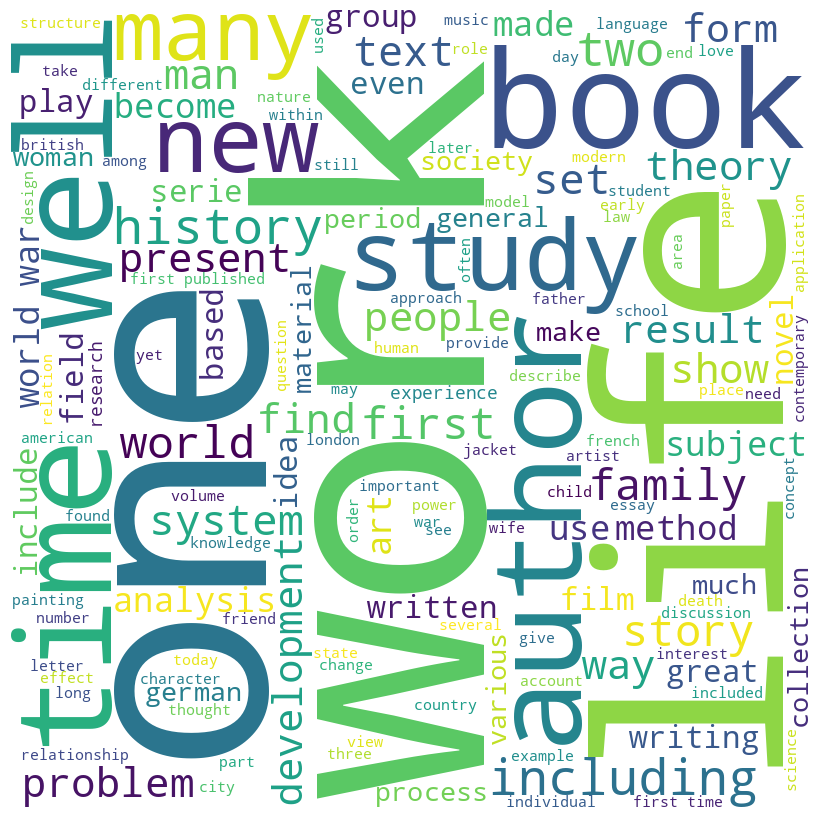

In [ ]:
# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

**Let's try different lemmetizer from spacy**

**Reasons for trying different Lemmetizer**

1. we observed that nltk lemmetizer did not reduced word to its base or root form for few words which impacted analysis. e.g. we have include and including both in word cloud with nltk lemmetizer

2. Generally SpaCy's lemmatizer is considered more accurate and efficient for larger-scale and industrial NLP applications. so it is good idea to start with nltk lemmetizer and check the imporved performance with spacy

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

2023-11-06 05:49:15.958607: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 05:49:15.958679: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 05:49:15.958729: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 05:49:15.969041: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 05:49:17.442637: W tensorflow/compiler/

In [ ]:
import spacy

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

def lemmatize_with_spacy(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Apply the lemmatization function to your column
df['summaries_by_eng1_wcat'] = df['summaries_by_eng1_wcat'].apply(lemmatize_with_spacy)

In [ ]:
# Lemmatized text from df data
lemmatized_text = ' '.join(df['summaries_by_eng1_wcat'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(lemmatized_text)

# Print the top words for the df data
print("Top words for df data:")
for word, freq in wordcloud.words_.items():
    print(f"{word}: {freq}")

Top words for df data:
work: 1.0
one: 0.7468240584598089
well: 0.6825182686902754
study: 0.6279932546374367
time: 0.5944912872400225
include: 0.5899943788645307
book: 0.5472737492973581
life: 0.5314221472737493
use: 0.5265879707700956
make: 0.5035413153456998
write: 0.4735244519392917
find: 0.46340640809443506
author: 0.4321528948847667
many: 0.43080382237211917
show: 0.3917931422147274
present: 0.37403035413153457
history: 0.37178189994378863
new: 0.3697582911748173
two: 0.3568296795952782
give: 0.35368184373243394
set: 0.3452501405283867
take: 0.33243395165823497
follow: 0.3316469926925239
man: 0.32366498032602586
describe: 0.32107925801011805
story: 0.32062956717256885
family: 0.3132096683530073
world: 0.30297920179876336
begin: 0.2987071388420461
become: 0.2976953344575604
see: 0.29724564362001127
form: 0.29465992130410346
result: 0.2917369308600337
lead: 0.2867903316469927
development: 0.2802698145025295
system: 0.2800449690837549
play: 0.2680157391793142
first: 0.2668915120854412

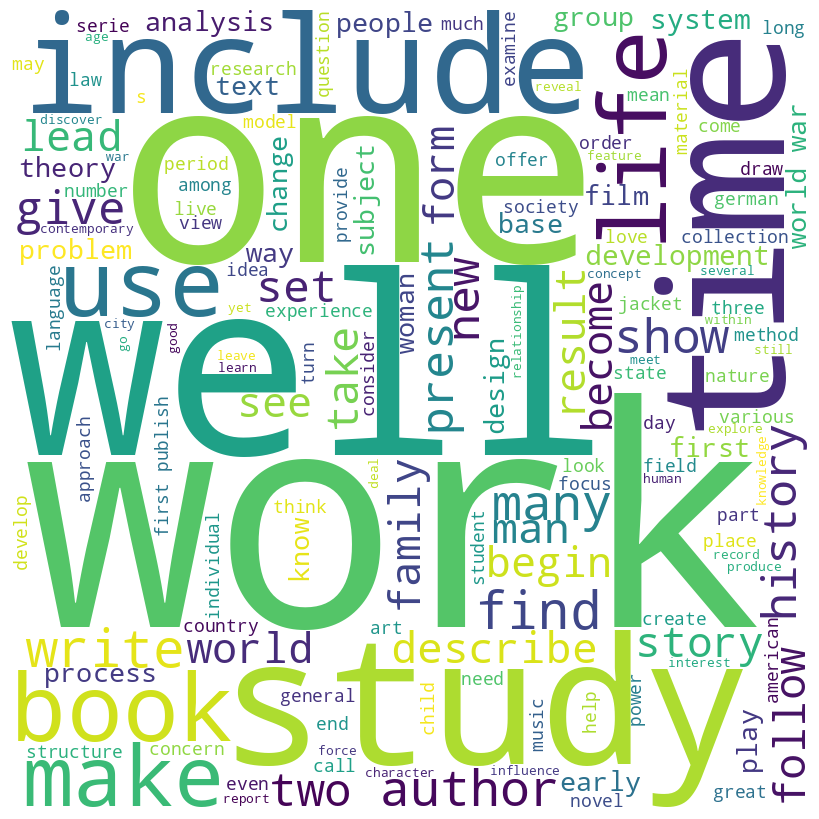

In [ ]:
# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

**Lets find top word phrases**

In [ ]:
import numpy as np
from IPython.display import display, HTML
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from nltk.corpus import stopwords

# Define stop words
stopwords_list = list(stopwords.words('english'))

html = ""

for num_words in range(1, 4):

    # Set up the necessary transformers and the classifier
    vectoriser = CountVectorizer(lowercase=True, stop_words=stopwords_list, min_df=5, max_features=1000,
                                 token_pattern=r'(?u)\b[a-zA-Z][a-zA-Z]+\b', ngram_range=(num_words,num_words))
    transformer = TfidfTransformer()

    # Fit the vectorizer
    X = vectoriser.fit_transform(df['summaries_by_eng1_wcat'])
    sums = X.sum(axis=0)

    html += (f"<h2>Top {num_words}-word phrases</h2>\n")
    html += "<table><tr><td>Rank</td><td>Word(s)</td><td>Count</td></tr>"

    # Display top terms based on their frequency
    top_term_indices = np.argsort(-sums).tolist()[0][:25]
    for ctr, idx in enumerate(top_term_indices):
        term = list(vectoriser.vocabulary_.keys())[list(vectoriser.vocabulary_.values()).index(idx)]
        html += (f"<tr><td>{ctr+1}</td><td>{term}</td><td>{sums[0,idx]}</td><tr>")

    html += "</tr></table>"

display(HTML(html))

Rank,Word(s),Count
1,work,19962
2,book,19849
3,first,14042
4,one,14026
5,include,13479
6,life,13346
7,new,12010
8,world,10317
9,volume,10100
10,also,9899


# **Benefits of top-k word phrases extractions (bi-grams and trigrams) over top-1 words extractions**




**1. Contextual Meaning:**


Single words like "war" or "world" (from your top 1-word phrases) have broad meanings and can relate to countless contexts. However, a bigram like "world war" immediately gives a historical and geopolitical context. Similarly, "world war ii" as a trigram provides an even more specific historical reference.

**2. Disambiguation:**

Words such as "first," "new," and "volume" are ambiguous on their own. But when these words are part of phrases like "first time," "new york," or "two volume," they provide clarity on what the text is specifically discussing.

**3. Capturing Specific Concepts:**

The phrase "nineteenth century" captures a specific time period, which is a concept that could not be gleaned from either "nineteenth" or "century" alone. "English translation" or "publisher description" are other examples where the combination of words captures a concept important for understanding the text's subject matter.

**4. Identifying Common Collocations:**

Phrases such as "fall in love," "young man," and "young woman" are common collocations in English. Analyzing these phrases can indicate common pairings of words that may reflect cultural expressions or idiomatic language used within the corpus.

**5. Revealing Relationships and Patterns:**

The bigram "fall love" (presumably from "fall in love") and trigram "world war ii" show relationships between words that reveal patterns in how language is used within the corpus. This can be particularly valuable for sentiment analysis, narrative analysis, or understanding discourse on certain topics.

# **Suggestions or next steps for further analysis**

**1. Data Preprocessing:**
1.1. Basic Cleaning:

•	Remove any metadata or non-relevant text sections (if present).

•	Convert all text to lowercase to ensure consistency.

1.2. Expand Contractions:

•	Convert contractions like "won't" to "will not" to ensure proper word separation and meaning.

1.3. Remove Stopwords:

•	Add domain-specific stopwords or commonly occurring words that might not add much context.

**2. Phrase Handling:**

2.1. Detect and Handle Significant Phrases:

•	Use tools like Phrases from the gensim library to detect significant bigrams and trigrams in our text.

•	Integrate these phrases into our dataset so they're treated as single entities (e.g., "world_war").

**3. Text Vectorization:**

3.1. Count Vectorization with N-grams:

•	Employ CountVectorizer with ngram_range to capture unigrams, bigrams, and trigrams.

•	Use parameters like min_df and max_df to filter out terms based on their frequency.

3.2. TF-IDF Vectorization:

•	TfidfVectorizer to give importance to terms that are unique to specific parts of our dataset. This can help in highlighting distinctive terms.

**4. Advanced Text Analysis:**

4.1. Stemming and Lemmatization:

•	While we've tried lemmatization, stemming is another option to reduce words to their base or root form.

 4.2. Topic Modeling:

•	Apply Latent Dirichlet Allocation (LDA) to identify distinct topics in the dataset.

•	Create word clouds for each identified topic to visualize the most significant terms per topic.

# **Task B**

Import libraries

In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [15]:
df= pd.read_csv('/content/drive/MyDrive/Jeanet/texts_nlp_50.csv', delimiter='\t')

In [16]:
df.head()

,year_viaf,fem,common_10first,latlon1,mainr,rni3,nprofs,reljob2,scijob2,genres_wcat,roles_wcat,associated_subjects_wcat,titles_by_eng1_wcat,titles_about_eng1_wcat,summaries_by_eng1_wcat,summaries_about_eng1_wcat,dup,dup_about
0,1810,0,0,331,685591,1,NaN,NaN,NaN,maps;; pictorial works;; tourist maps;; pictor...,author;; cartographer;; artist;; illustrator;;...,france--paris;; fortification;; streets;; fran...,"the hotel dieu, paris: as seen from pont st. m...",NaN,in addition to the present edition vallee list...,NaN,1,51660
1,1882,0,1,505,3868102,0,NaN,NaN,NaN,history;; diaries;; caricatures and cartoons,author;; author of introduction;; creator,communism;; socialism;; soviet union;; barbell...,the moscow trial;; a last diary ... with a pre...,NaN,an account of the state trial in moscow of the...,NaN,0,51660
2,1894,0,1,509,3967398,1,1.0,0.0,0.0,history;; fiction,author;; editor,great britain;; fascism;; city promotion;; cit...,action; for king and people;; what the british...,the rebel who lost his cause : the tragedy of ...,NaN,"""""even by the standards of the heated politic...",26422,0
3,1922,feminine,0,290,1600928,1,2.0,0.0,1.0,classification;; bibliographies;; handbooks an...,author;; translator;; editor;; contributor;; o...,botany;; micronesia;; plants;; sedimentary str...,NaN,NaN,the pantropical thespesia populnea (malvaceae...,NaN,0,51660
4,1865,0,0,509,5761595,0,2.0,0.0,0.0,fiction;; humorous fiction;; satire;; juvenile...,illustrator;; author,mistaken identity;; american wit and humor;; i...,told by the colonel;; a dozen all told : bein...,catalogue of an exhibition of water colours b...,"percy groves, a spirited english lad, joins hi...",(1) requests a box to take hal hurst and anoth...,0,0


In [17]:
###checking nan

num_nan_values = df['titles_by_eng1_wcat'].isna().sum()
print(num_nan_values)


14215


In [18]:
###removing Nan rows
df = df.dropna(subset=['titles_by_eng1_wcat'])

In [19]:
### converting summaries_by_eng1_wcat column to string

df['titles_by_eng1_wcat']= df['titles_by_eng1_wcat'].astype(str)

**Custom stopwords**

In [20]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')

# Load standard English stopwords from NLTK and convert to a set for faster operations
standard_stopwords = set(stopwords.words('english'))

# Your list of domain-specific stop words
domain_specific_stopwords_list = ['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', "couldn't", 'course', 'currently', 'd', 'definitely', 'described', 'despite', 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', "don't", 'done', 'down', 'downwards', 'during', 'e', 'each', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhere', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'f', 'far', 'few', 'fifth', 'first', 'five', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'four', 'from', 'further', 'furthermore', 'g', 'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 'h', 'had', "hadn't", 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', "he's", 'hello', 'help', 'hence', 'her', 'here', "here's", 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'hi', 'him', 'himself', 'his', 'hither', 'hopefully', 'how', 'howbeit', 'however', 'i', "i'd", "i'll", "i'm", "i've", 'ie', 'if', 'ignored', 'immediate', 'in', 'inasmuch', 'inc', 'indeed', 'indicate', 'indicated', 'indicates', 'inner', 'insofar', 'instead', 'into', 'inward', 'is', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'j', 'just', 'k', 'keep', 'keeps', 'kept', 'know', 'known', 'knows', 'l', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', "let's", 'like', 'liked', 'likely', 'little', 'look', 'looking', 'looks', 'ltd', 'm', 'mainly', 'many', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'merely', 'might', 'more', 'moreover', 'most', 'mostly', 'much', 'must', 'my', 'myself', 'n', 'name', 'namely', 'nd', 'near', 'nearly', 'necessary', 'need', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'no', 'nobody', 'non', 'none', 'noone', 'nor', 'normally', 'not', 'nothing', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'p', 'particular', 'particularly', 'per', 'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provides', 'q', 'que', 'quite', 'qv', 'r', 'rather', 'rd', 're', 'really', 'reasonably', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 'she', 'should', "shouldn't", 'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 'such', 'sup', 'sure', 't', "t's", 'take', 'taken', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that's", 'thats', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', "there's", 'thereafter', 'thereby', 'therefore', 'therein', 'theres', 'thereupon', 'these', 'they', "they'd", "they'll", "they're", "they've", 'think', 'third', 'this', 'thorough', 'thoroughly', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 'unless', 'unlikely', 'until', 'unto', 'up', 'upon', 'us', 'use', 'used', 'useful', 'uses', 'using', 'usually', 'uucp', 'v', 'value', 'various', 'very', 'via', 'viz', 'vs', 'w', 'want', 'wants', 'was', "wasn't", 'way', 'we', "we'd", "we'll", "we're", "we've", 'welcome', 'well', 'went', 'were', "weren't", 'what', "what's", 'whatever', 'when', 'whence', 'whenever', 'where', "where's", 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', "who's", 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'willing', 'wish', 'with', 'within', 'without', "won't", 'wonder', 'would', "wouldn't", 'x', 'y', 'yes', 'yet', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 'z', 'zero', 'provide', 'available', 'availability', 'provision']

# Convert your list to a set
domain_specific_stopwords = set(domain_specific_stopwords_list)

# Combine the standard stopwords with your domain-specific stopwords
combined_stopwords = standard_stopwords.union(domain_specific_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df['titles_by_eng1_wcat'] = df['titles_by_eng1_wcat'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in combined_stopwords]))


###apply contractions for normalization of words

In [22]:
import re

# Dictionary of English contractions
contractions_dict = {
    "won't": "will not",
    "can't": "cannot",
    "n't": " not",
    "'re": " are",
    "'s": " is",
    "'d": " would",
    "'ll": " will",
    "'t": " not",
    "'ve": " have",
    "'m": " am"
}

# Regular expression for finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]

    return contractions_re.sub(replace, text)

# Apply the function to the column
df['titles_by_eng1_wcat'] = df['titles_by_eng1_wcat'].apply(lambda x: expand_contractions(x) if isinstance(x, str) else x)

Lemmatize the Text

In [23]:
import spacy

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

def lemmatize_with_spacy(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Apply the lemmatization function to your column
df['titles_by_eng1_wcat'] = df['titles_by_eng1_wcat'].apply(lemmatize_with_spacy)

Below code uses Gensim model to integrate phrases into our dataset so they're treated as single entities (e.g., "world_war").

In [24]:
import pandas as pd
from gensim.models.phrases import Phrases, Phraser
from gensim.utils import simple_preprocess

# Tokenize the text using gensim's simple_preprocess
sentences = df['titles_by_eng1_wcat'].apply(lambda x: simple_preprocess(x) if isinstance(x, str) else [])

# Train the Phrases model to detect bigrams and trigrams
phrases = Phrases(sentences, min_count=5, threshold=10) # Threshold and min_count can be tuned
bigram = Phraser(phrases)

# Apply the trained model to stick words together for bigrams
sentences_with_bigrams = [bigram[sentence] for sentence in sentences]

# If you want to detect trigrams or higher order n-grams, you can train another Phrases model
# on top of the bigram-transformed sentences:
trigram = Phrases(bigram[sentences], threshold=10)
trigram_model = Phraser(trigram)

# Apply the trained model to stick words together for trigrams
sentences_with_trigrams = [trigram_model[bigram[sentence]] for sentence in sentences]

# Now, sentences_with_trigrams contains sentences with phrases detected and merged.
# To put these back into your DataFrame:
df['titles_with_phrases'] = [' '.join(sentence) for sentence in sentences_with_trigrams]


In [26]:
df['titles_with_phrases'].tolist()

['hotel dieu paris pont st michel river etch huguenet testard',
 'moscow trial diary preface arthur cummings coronation day tuesday june nd report time laurence thompson cumming other news chronicle daily sketch newspaper',
 'action king people british union offer britain',
 'tell colonel dozen tell set twelve story ship pass night in clover',
 'battle christians turk cavalry engagement tower military encampment wall town river_landscape village figure military encampment wall town cavalry_skirmish',
 'method measure marginal utility method measure marginal utility cooperation politician econometrician formalization political preference',
 'report_case_argue_determine high_court_chancery_time lord_chancellor eldon report_case_argue_determine high_court_chancery_time lord_chancellor_cottenham report_case_argue_determine high_court_chancery_time lord_chancellor_cottenham report_case_argue_determine high_court_chancery_time lord_chancellor_cottenham letter governor subscribers st_george b

### word cloud with phrases and lemmatization applied

In [27]:
# Lemmatized text from df data
lemmatized_text = ' '.join(df['titles_with_phrases'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(lemmatized_text)

# Print the top words for the df data
print("Top words for df data:")
for word, freq in wordcloud.words_.items():
    print(f"{word}: {freq}")

Top words for df data:
history: 1.0
letter: 0.8446014127144299
work: 0.7527749747729566
book: 0.7164480322906155
life: 0.715438950554995
account: 0.6115035317860746
church: 0.6115035317860746
study: 0.6014127144298688
mr: 0.5867810292633703
man: 0.5696266397578204
year: 0.565590312815338
time: 0.5595358224016145
english: 0.5418768920282543
art: 0.5388496468213926
part: 0.536326942482341
report: 0.5267406659939455
state: 0.49142280524722504
make: 0.48335015136226034
late: 0.4439959636730575
law: 0.42078708375378404
present: 0.41422805247225025
general: 0.41422805247225025
people: 0.4112008072653885
include: 0.4091826437941473
add: 0.4066599394550959
note: 0.39606458123107974
england: 0.3905146316851665
author: 0.38647830474268413
relation: 0.38244197780020184
school: 0.3763874873864783
great: 0.37336024217961655
john: 0.36629667003027244
view: 0.363773965691221
observation: 0.3617558022199798
essay: 0.35872855701311807
story: 0.3511604439959637
address: 0.3501513622603431
german: 0.3471

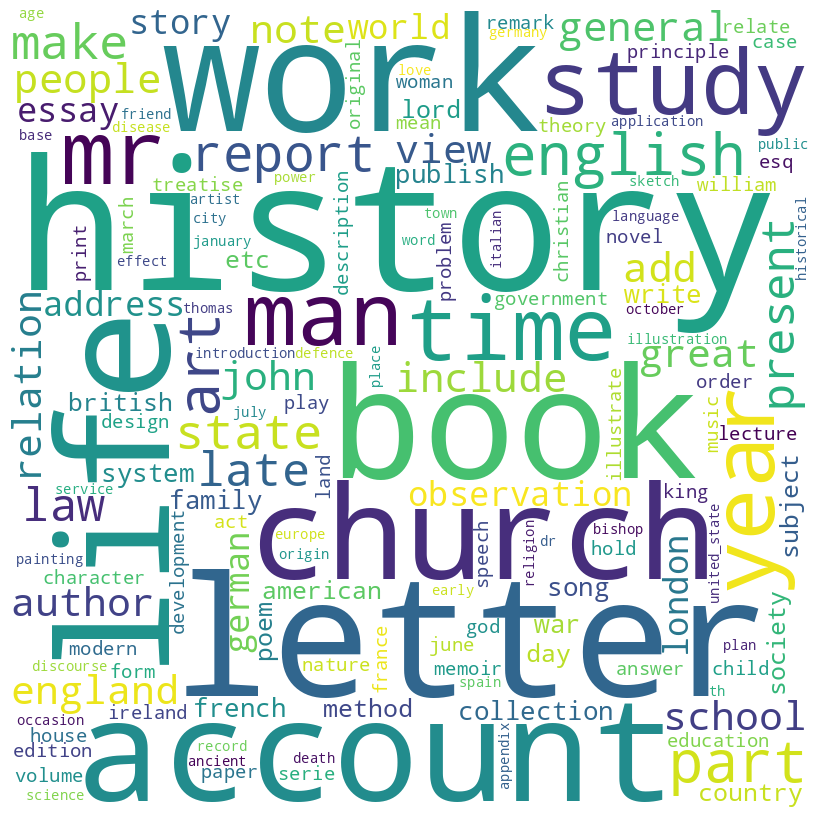

In [28]:
# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

Now that we have visualized for uni-gram phrases, let's see if we get more insights with bi-grams and tri-grams

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
bi_grams

['hotel dieu',
 'dieu paris',
 'paris pont',
 'pont st',
 'st michel',
 'michel river',
 'river etch',
 'etch huguenet',
 'huguenet testard',
 'moscow trial',
 'trial diary',
 'diary preface',
 'preface arthur',
 'arthur cummings',
 'cummings coronation',
 'coronation day',
 'day tuesday',
 'tuesday june',
 'june nd',
 'nd report',
 'report time',
 'time laurence',
 'laurence thompson',
 'thompson cumming',
 'cumming other',
 'other news',
 'news chronicle',
 'chronicle daily',
 'daily sketch',
 'sketch newspaper',
 'action king',
 'king people',
 'people british',
 'british union',
 'union offer',
 'offer britain',
 'tell colonel',
 'colonel dozen',
 'dozen tell',
 'tell set',
 'set twelve',
 'twelve story',
 'story ship',
 'ship pass',
 'pass night',
 'night in',
 'in clover',
 'battle christians',
 'christians turk',
 'turk cavalry',
 'cavalry engagement',
 'engagement tower',
 'tower military',
 'military encampment',
 'encampment wall',
 'wall town',
 'town river_landscape',
 'riv

In [34]:
import nltk
from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Tokenize the text and convert to lowercase
tokens = [word_tokenize(text.lower()) for text in df['titles_with_phrases']]

# Generate bi-grams and tri-grams, joined by underscores
bi_grams = ['_'.join(gram) for text in tokens for gram in bigrams(text)]
tri_grams = ['_'.join(gram) for text in tokens for gram in trigrams(text)]

# Join the bi-grams and tri-grams back into a string
bi_grams_text = ' '.join(bi_grams)
tri_grams_text = ' '.join(tri_grams)

### Generate and Display the Bi-grams Word Cloud

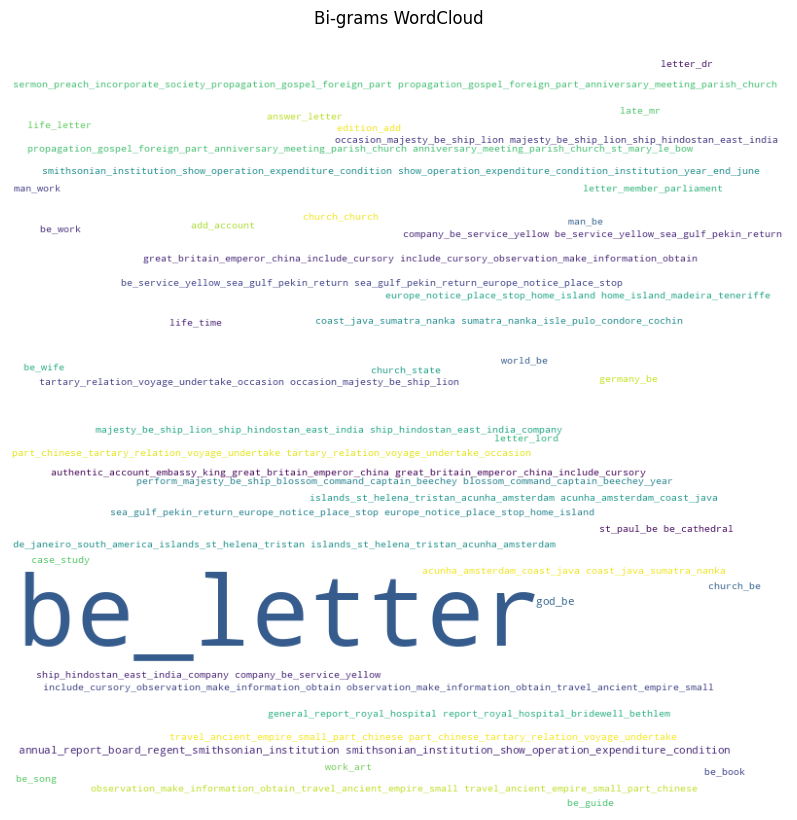

In [50]:
# Create WordCloud object for bi-grams
wordcloud_bi = WordCloud(width=800, height=800, max_font_size=100,prefer_horizontal=1, background_color='white', max_words=50).generate(bi_grams_text)

# Display the bi-grams WordCloud
plt.figure(figsize=(8, 8), facecolor=None)  # Adjust the size as needed
plt.imshow(wordcloud_bi)
plt.axis("off")
plt.title('Bi-grams WordCloud')
plt.tight_layout(pad=0)
plt.show()


**Top phrases with uni-grams and tfidf vectorizer**

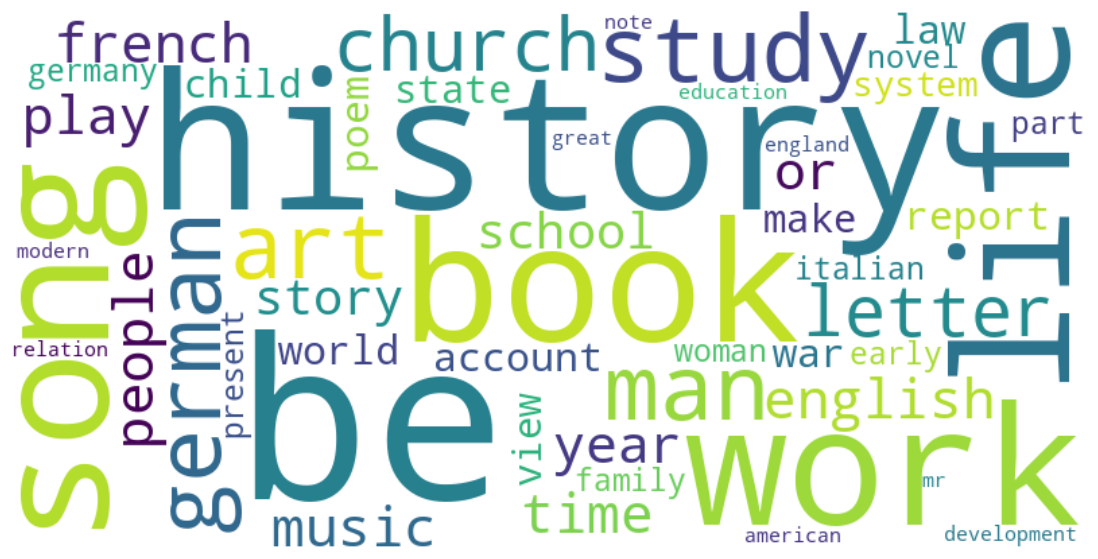

In [58]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize a TfidfVectorizer with n-gram range from 1 to 3
tfidf_vect = TfidfVectorizer(ngram_range=(1, 3))

# Apply the TfidfVectorizer to the text data
tfidf_vect_matrix = tfidf_vect.fit_transform(df['titles_with_phrases'])

# Sum the TF-IDF scores for each term in the corpus
summed_tfidf = tfidf_vect_matrix.sum(axis=0)

# Map from term index to term to be able to access terms
terms = tfidf_vect.get_feature_names_out()

# Sort terms by their summed TF-IDF score in descending order
sorted_terms = [(terms[i], summed_tfidf[0, i]) for i in range(summed_tfidf.shape[1])]
sorted_terms.sort(key=lambda x: x[1], reverse=True)

# Now let's take the top N terms for the word cloud
top_n_terms = sorted_terms[:50]  # Adjust N as needed

# Extract the words and their frequencies for the word cloud
words_freq = {term: freq for term, freq in top_n_terms}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white')
wordcloud.generate_from_frequencies(words_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Top phrases with only bi-grams and tri-grams and tfidf vectorizer**

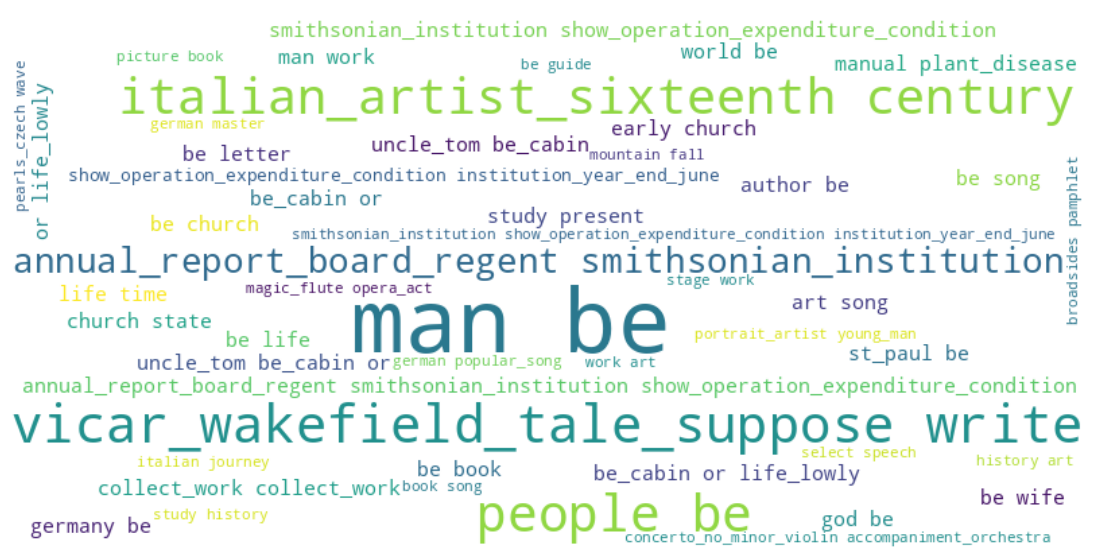

In [59]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Initialize a TfidfVectorizer with n-gram range from 2 to 3 for bi-grams and tri-grams
tfidf_vect = TfidfVectorizer(ngram_range=(2, 3))

# Apply the TfidfVectorizer to the text data
tfidf_vect_matrix = tfidf_vect.fit_transform(df['titles_with_phrases'])

# Sum the TF-IDF scores for each term in the corpus
summed_tfidf = tfidf_vect_matrix.sum(axis=0)

# Map from term index to term to be able to access terms
terms = tfidf_vect.get_feature_names_out()

# Sort terms by their summed TF-IDF score in descending order
sorted_terms = [(terms[i], summed_tfidf[0, i]) for i in range(summed_tfidf.shape[1])]
sorted_terms.sort(key=lambda x: x[1], reverse=True)

# Now let's take the top N terms for the word cloud
top_n_terms = sorted_terms[:50]  # Adjust N as needed

# Extract the words and their frequencies for the word cloud
words_freq = {term: freq for term, freq in top_n_terms}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white')
wordcloud.generate_from_frequencies(words_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [60]:
words_freq

{'man be': 8.109773341559272,
 'vicar_wakefield_tale_suppose write': 7.337671679520379,
 'people be': 6.793536714053036,
 'italian_artist_sixteenth century': 6.397410453080369,
 'annual_report_board_regent smithsonian_institution': 5.9687888107578315,
 'annual_report_board_regent smithsonian_institution show_operation_expenditure_condition': 5.9687888107578315,
 'smithsonian_institution show_operation_expenditure_condition': 5.9687888107578315,
 'be church': 5.938439545714994,
 'author be': 5.917276816542834,
 'collect_work collect_work': 5.916874736715158,
 'be wife': 5.86197387323083,
 'be letter': 5.738246715136847,
 'man work': 5.716491396220581,
 'be book': 5.378563018205743,
 'world be': 5.26758539758984,
 'life time': 5.116552778375255,
 'uncle_tom be_cabin': 5.099629604186504,
 'early church': 5.084864778518382,
 'manual plant_disease': 5.0,
 'st_paul be': 4.979184339093938,
 'be song': 4.953980807504337,
 'church state': 4.876506548041662,
 'be_cabin or': 4.823681555437786,
 '